In [1]:
from scipy.io import wavfile
import IPython.display as ipd
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt

In [2]:
figsize = (20, 5)

In [3]:
# play a few sample files
fname = 'sample.wav'
ipd.Audio(fname)

In [4]:
fname = 'sample2.wav'
ipd.Audio(fname)

In [34]:
def get_bpm(filename, smooth=False, figsize=(20, 5)):
    # read data
    rate, data = wavfile.read(filename)
    print('Sampling (frame) rate = {}'.format(rate))
    print('Total samples (frames) = {}'.format(data.shape[0]))
    duration = data.shape[0] / rate
    print('Duration = {:.1f} s'.format(duration))

    # do some pre-processing
    data = np.array([float(x) for x in data])
    data_mean = np.mean(data)
    data -= data_mean
    data = np.abs(data)

    if smooth:
        window = np.ones((10000,))
        data = np.convolve(data, window, mode='same')

    plt.figure(figsize=figsize)
    plt.plot(data)
    ticks, labels = plt.xticks()
    plt.xticks(ticks, map(lambda val: '{:.0f}'.format(val), ticks / rate))
    plt.xlim(0, duration * rate)
    plt.xlabel('Time (s)')
    plt.show()

    nfft = len(data)
    data_ft = np.abs(np.fft.rfft(data, nfft))
    # zero the DC component
    data_ft[0] = 0

    tsamp = 1.0 / rate
    data_freq = np.fft.rfftfreq(nfft, d=tsamp)

    # compute upper limit for plotting/peak-finding
    upper_limit = 5    # Hz (corresponding to 300 bpm)
    delta_f = (rate / 2) / len(data_ft)
    len_limit = int(np.round(upper_limit / delta_f))

    plt.figure(figsize=figsize)
    plt.plot(data_freq[:len_limit], data_ft[:len_limit])
    plt.xlim(0, upper_limit)
    plt.xlabel('Frequency (Hz)')
    plt.show()

    freq = data_freq[np.argmax(data_ft[:len_limit])]
    print('Peak frequency = {:.3f} Hz'.format(freq))
    bpm = int(np.round(freq * 60))
    print('Heart rate = {} bpm'.format(bpm))

    return bpm

In [5]:
rate, data = wavfile.read('sample2.wav')
print('Sampling (frame) rate = {}'.format(rate))
print('Total samples (frames) = {}'.format(data.shape[0]))
duration = data.shape[0] / rate
print('Duration = {:.1f} s'.format(duration))

Sampling (frame) rate = 44100
Total samples (frames) = 1058400
Duration = 24.0 s


In [6]:
data = np.array([float(x) for x in data])
print(data.dtype)
data_mean = np.mean(data)
data -= data_mean

float64


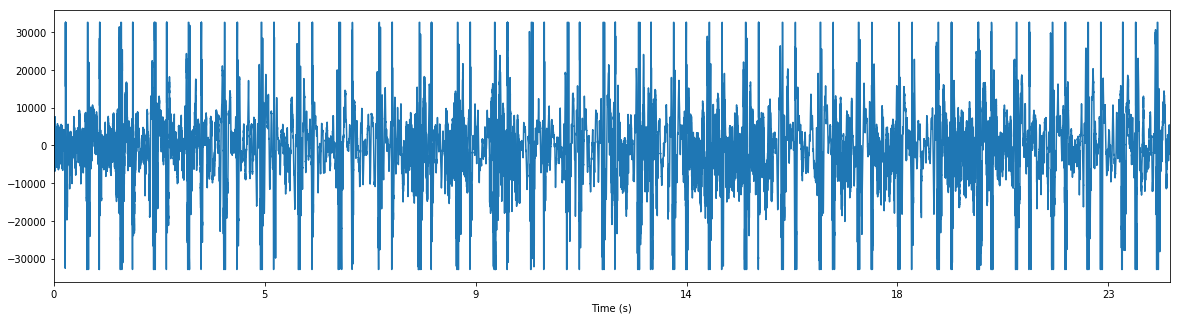

In [7]:
plt.figure(figsize=figsize)
plt.plot(data)
ticks, labels = plt.xticks()
plt.xticks(ticks, map(lambda val: '{:.0f}'.format(val), ticks / rate))
plt.xlim(0, duration * rate)
plt.xlabel('Time (s)')
plt.show()

1058400
2.2675736961451248e-05


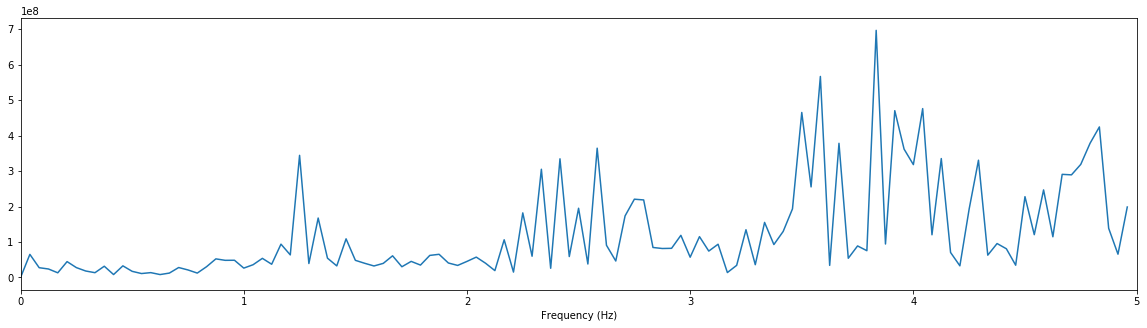

In [8]:
nfft = len(data)
print(nfft)
data_ft = np.abs(np.fft.rfft(data, nfft))

tsamp = 1.0 / rate
print(tsamp)
data_freq = np.fft.rfftfreq(nfft, d=tsamp)

# compute upper limit for plotting/peak-finding
upper_limit = 5    # Hz (corresponding to 300 bpm)
delta_f = (rate / 2) / len(data_ft)
len_limit = int(np.round(upper_limit / delta_f))

plt.figure(figsize=figsize)
#plt.plot(data_ft)
plt.plot(data_freq[:len_limit], data_ft[:len_limit])
plt.xlim(0, upper_limit)
plt.xlabel('Frequency (Hz)')
plt.show()

In [9]:
data = np.abs(data)

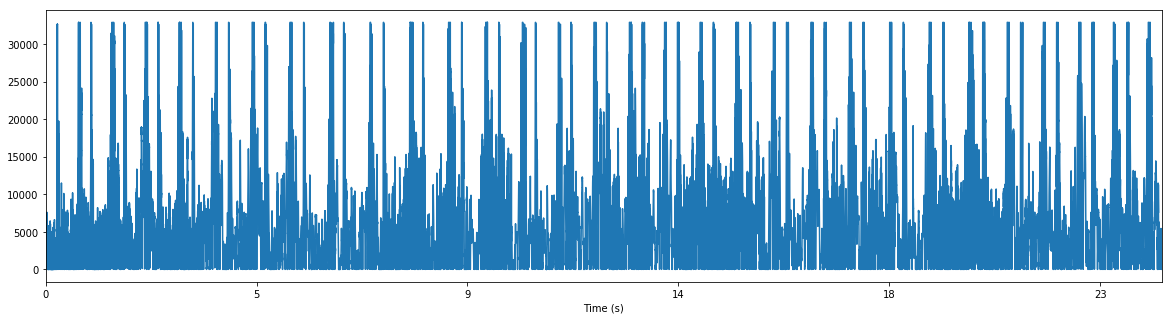

In [10]:
plt.figure(figsize=figsize)
plt.plot(data)
plt.xticks(ticks, map(lambda val: '{:.0f}'.format(val), ticks / rate))
plt.xlim(0, duration * rate)
plt.xlabel('Time (s)')
plt.show()

1058400
2.2675736961451248e-05


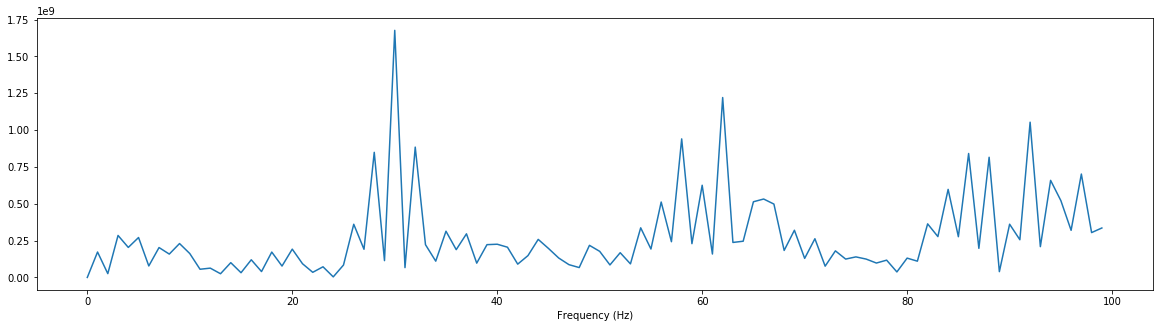

In [11]:
nfft = len(data)
print(nfft)
data_ft = np.abs(np.fft.rfft(data, nfft))
# zero the DC component
data_ft[0] = 0

tsamp = 1.0 / rate
print(tsamp)
data_freq = np.fft.rfftfreq(nfft, d=tsamp)

# compute upper limit for plotting/peak-finding
upper_limit = 5    # Hz (corresponding to 300 bpm)
delta_f = (rate / 2) / len(data_ft)
len_limit = int(np.round(upper_limit / delta_f))

plt.figure(figsize=figsize)
plt.plot(data_ft[:100])
#plt.plot(data_freq[:len_limit], data_ft[:len_limit])
#plt.xlim(0, upper_limit)
plt.xlabel('Frequency (Hz)')
plt.show()

In [13]:
window = np.ones((10000,))
data = np.convolve(data, window, mode='same')
#data = data[::100]

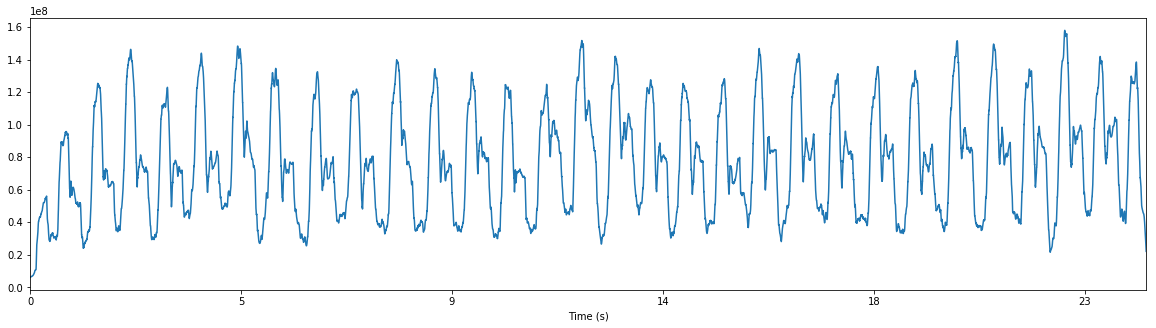

In [14]:
plt.figure(figsize=figsize)
plt.plot(data)
plt.xticks(ticks, map(lambda val: '{:.0f}'.format(val), ticks / rate))
plt.xlim(0, duration * rate)
plt.xlabel('Time (s)')
plt.show()

1058400
2.2675736961451248e-05


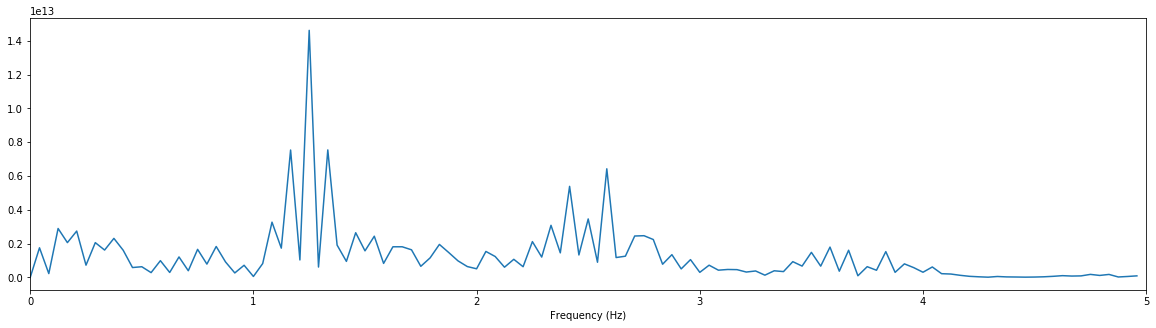

In [15]:
nfft = len(data)
print(nfft)
data_ft = np.abs(np.fft.rfft(data, nfft))
# zero the DC component
data_ft[0] = 0

tsamp = 1.0 / rate
print(tsamp)
data_freq = np.fft.rfftfreq(nfft, d=tsamp)

# compute upper limit for plotting/peak-finding
upper_limit = 5    # Hz (corresponding to 300 bpm)
delta_f = (rate / 2) / len(data_ft)
len_limit = int(np.round(upper_limit / delta_f))

plt.figure(figsize=figsize)
#plt.plot(data_ft)
plt.plot(data_freq[:len_limit], data_ft[:len_limit])
plt.xlim(0, upper_limit)
plt.xlabel('Frequency (Hz)')
plt.show()

Sampling (frame) rate = 44100
Total samples (frames) = 936684
Duration = 21.2 s


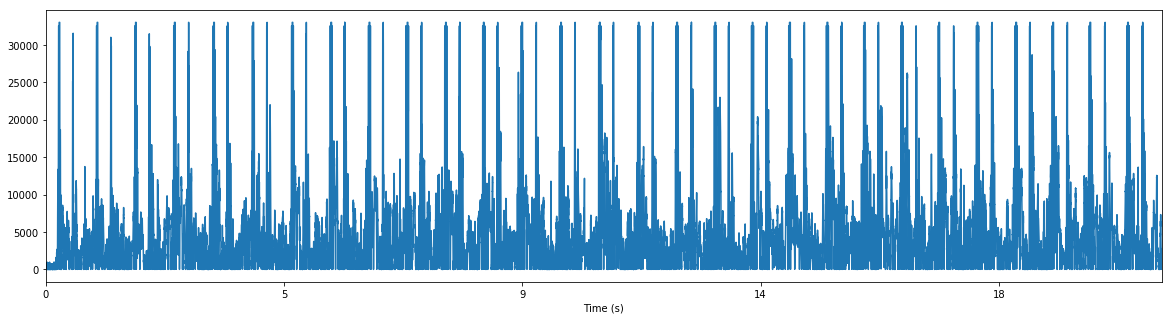

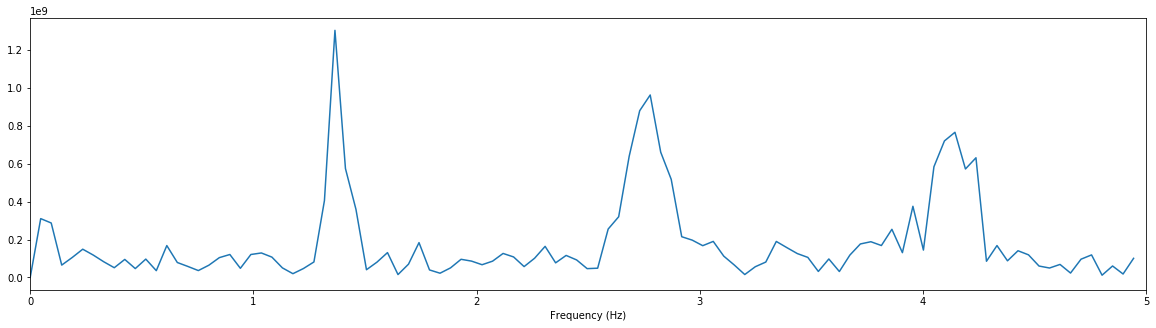

Peak frequency = 1.365 Hz
Heart rate = 82 bpm


82

In [26]:
get_bpm('sample.wav')

Sampling (frame) rate = 44100
Total samples (frames) = 1058400
Duration = 24.0 s


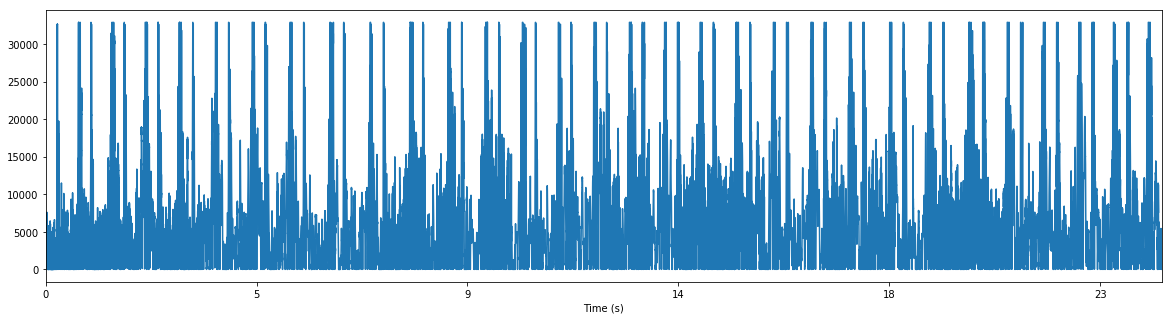

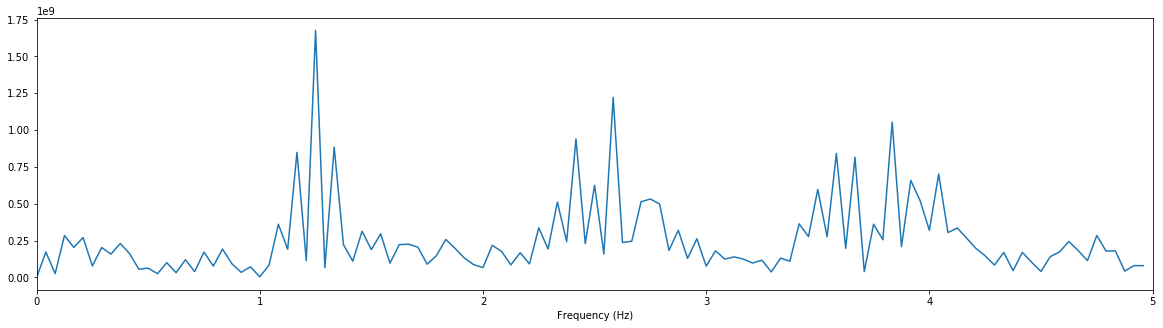

Peak frequency = 1.250 Hz
Heart rate = 75 bpm


75

In [27]:
get_bpm('sample2.wav')

Sampling (frame) rate = 44100
Total samples (frames) = 931392
Duration = 21.1 s


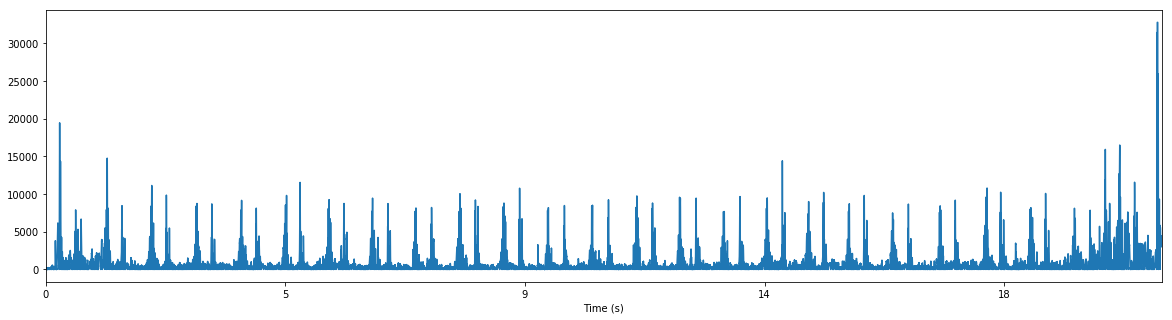

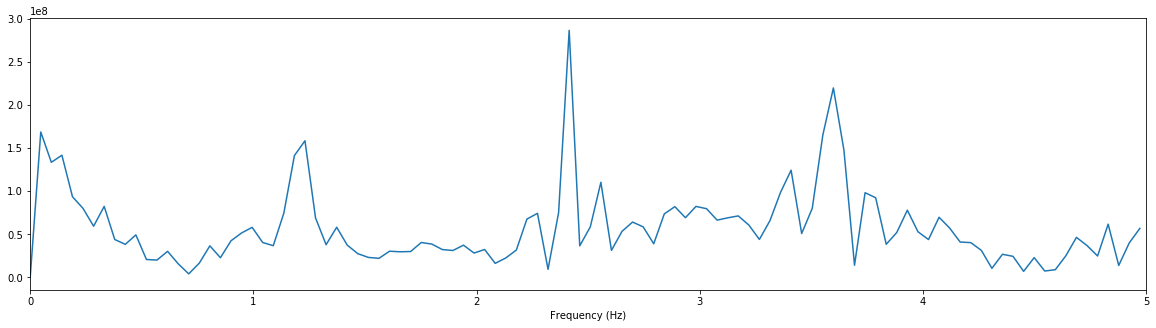

Peak frequency = 2.415 Hz
Heart rate = 145 bpm


145

In [35]:
get_bpm('sample3.wav')

Sampling (frame) rate = 44100
Total samples (frames) = 931392
Duration = 21.1 s


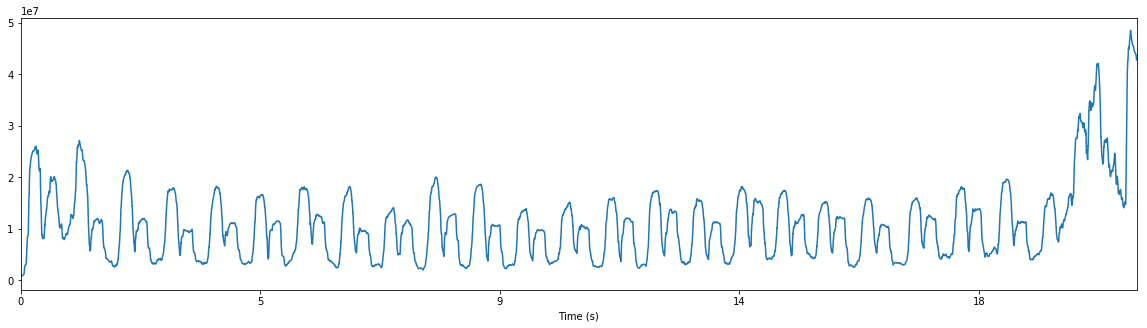

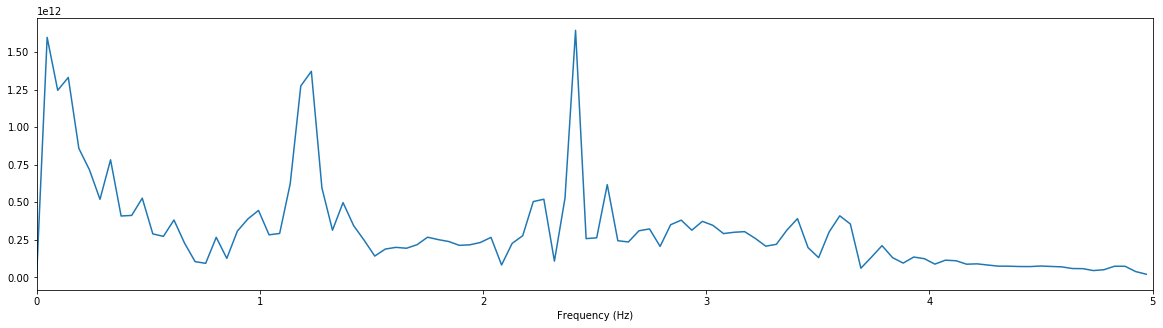

Peak frequency = 2.415 Hz
Heart rate = 145 bpm


145

In [36]:
get_bpm('sample3.wav', smooth=True)

In [ ]:
# # find peak
# hrFTMean = np.mean(hrFT)
# peaks = hrFT - (3 * hrFTMean)
# peaks[peaks < 0] = 0.0
# peakIdx = ss.find_peaks_cwt(peaks, [4])
# #print(peakIdx)
# #print(hrFreq[peakIdx[0]])
# hrEst = hrFreq[peakIdx[0]] * 60
# print("Estimated heart rate =", hrEst, "bpm")